In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install qwikidata

In [ ]:
import bz2
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from qwikidata.linked_data_interface import get_entity_dict_from_api

In [ ]:
# Load the new file as a dataframe
file_path = '/content/drive/MyDrive/ada/quotes-2020-repub-dem.json.bz2'
df = pd.read_json(file_path, compression='bz2')
df

,quoteID,quotation,speaker,qids,probas,gender,occupation,party
0,2020-01-16-000088,[ Department of Homeland Security ] was livid ...,Sue Myrick,Q367796,"[[Sue Myrick, 0.8867], [None, 0.0992], [Ron Wy...",[Q6581072],[Q82955],[Q29468]
1,2020-01-16-012811,cancel contracts to train Saudi police and oth...,Sue Myrick,Q367796,"[[Sue Myrick, 0.8677], [None, 0.1323]]",[Q6581072],[Q82955],[Q29468]
2,2020-01-16-094237,to block the sale of sensitive military munitions,Sue Myrick,Q367796,"[[Sue Myrick, 0.604], [Ron Wyden, 0.2891], [No...",[Q6581072],[Q82955],[Q29468]
3,2020-02-28-013721,enlisted the help of Hezbollah,Sue Myrick,Q367796,"[[Sue Myrick, 0.7064], [None, 0.2936]]",[Q6581072],[Q82955],[Q29468]
4,2020-02-28-034001,implies a Persian influence that can likely be...,Sue Myrick,Q367796,"[[Sue Myrick, 0.963], [None, 0.037]]",[Q6581072],[Q82955],[Q29468]
...,...,...,...,...,...,...,...,...
444089,2020-02-14-054657,It's not only affecting businesses but it's al...,Tim Stine,Q21064330,"[[Tim Stine, 0.7644], [None, 0.2356]]",[Q6581097],"[Q43845, Q82955]",[Q29552]
444090,2020-02-06-002083,A nonprofit will open some other doors. It wil...,Pat McDonough,Q7143736,"[[Pat McDonough, 0.9043], [None, 0.0957]]",[Q6581097],[Q82955],[Q29468]
444091,2020-02-07-000825,"5-point Border Security Initiative,",Roger Hedgecock,Q3439068,"[[Roger Hedgecock, 0.6745], [Carl DeMaio, 0.25...",[Q6581097],"[Q2722764, Q82955]",[Q29468]
444092,2020-02-18-007399,"As the city's mayor, the issues that were most...",Daniel M. Pierce,Q18739817,"[[Daniel M. Pierce, 0.5388], [None, 0.4612]]",[Q6581097],"[Q40348, Q82955]",[Q29552]


In [ ]:
# Add number of quotations per qid to dataframe (Caution: this column is already aggregated)
df['quotationCounts'] = df.groupby(['qids'])['quoteID'].transform("count")

In [ ]:
republican_qid = 'Q29468'
democrats_qid = 'Q29552'
republicans_df = df.loc[df['party'].str[0] == republican_qid] #People from the republican party
democrats_df = df.loc[df['party'].str[0] == democrats_qid] #People from the democratic party

In [ ]:
#number of of quotations per qid for republicans
n_quotes_per_qid_repub = republicans_df.groupby(['qids'])['quotationCounts'].mean()
n_quotes_per_qid_repub.describe()

In [ ]:
#number of of quotations per qid for democrats
n_quotes_per_qid_demo = democrats_df.groupby(['qids'])['quotationCounts'].mean()
n_quotes_per_qid_demo.describe()

The number of the republican speakers (3754) and  the democrats (3924) is almost the same. 

Text(0, 0.5, 'Number of Speakers')

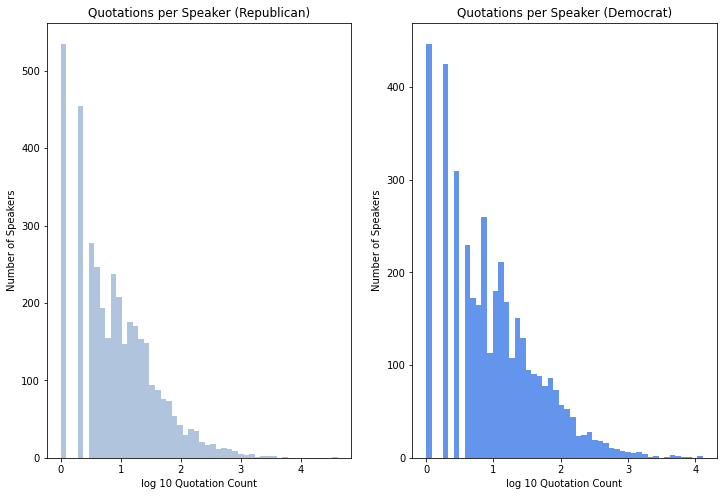

In [ ]:
# Visualize the number of quotations per speaker grouped by Democrats and Republicans
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

subplot = axes[0];
subplot.hist(np.log10(n_quotes_per_qid_repub), bins = 50, color="lightsteelblue")#
subplot.set_title("Quotations per Speaker (Republican)")
subplot.set_xlabel("log 10 Quotation Count")
subplot.set_ylabel("Number of Speakers")


subplot = axes[1];
subplot.hist(np.log10(n_quotes_per_qid_demo), bins = 50, color="cornflowerblue")
subplot.set_title("Quotations per Speaker (Democrat)")
subplot.set_xlabel("log 10 Quotation Count")
subplot.set_ylabel("Number of Speakers")


In [ ]:
# Top Speakers of the Democratic Party
n_quotes_per_qid_demo.sort_values(ascending=False)

qids
Q6279        12937
Q11673       11133
Q434706       7672
Q7173106      6111
Q607          6041
             ...  
Q350542          1
Q5622348         1
Q16194806        1
Q56192167        1
Q991543          1
Name: quotationCounts, Length: 3924, dtype: int64

In [ ]:
# Top Speakers of the Republican Party
n_quotes_per_qid_repub.sort_values(ascending=False)

qids
Q22686       41358
Q473239       6000
Q24313        3530
Q355522       3355
Q33190271     2994
             ...  
Q171989          1
Q5213267         1
Q17091503        1
Q17027771        1
Q16987098        1
Name: quotationCounts, Length: 3754, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


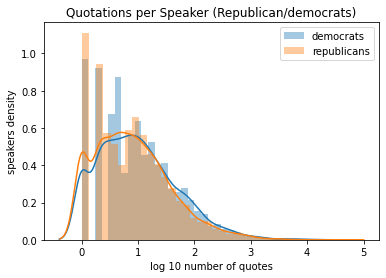

In [ ]:
ax = sns.distplot(np.log10(n_quotes_per_qid_demo), hist=True, label='democrats');
ax = sns.distplot(np.log10(n_quotes_per_qid_repub), hist=True, label='republicans')
ax.set(title='Quotations per Speaker (Republican/democrats)',xlabel='log 10 number of quotes', ylabel='speakers density')
plt.legend()
plt.show()

## Distribution of male/female speaker within each political party

In [ ]:
female_qid = 'Q6581072'
male_qid = 'Q6581097'
# let's start with the republicans
repub_females = republicans_df[republicans_df['gender'].str[0] == female_qid ]
repub_females.describe()

,quotationCounts
count,25844.000000
mean,436.856214
std,456.722322
min,1.000000
25%,53.000000
50%,250.000000
75%,674.000000
max,1432.000000


In [ ]:
repub_males = republicans_df[republicans_df['gender'].str[0] == male_qid ]
repub_males.describe()

,quotationCounts
count,161675.000000
mean,11363.897133
std,17634.280375
min,1.000000
25%,132.000000
50%,817.000000
75%,41358.000000
max,41358.000000


In [ ]:
female_male_quotes_fraction_repub = len(repub_females)/len(republicans_df)*100
print(f'only {female_male_quotes_fraction_repub:.2f} % of the republican quotes are delivered from women')

only 13.76 % of the republican quotes are delivered from women


In [ ]:
#let's do the same analysis with the democrats
democrats_females = democrats_df[democrats_df['gender'].str[0] == female_qid ]
democrats_females

In [ ]:
democrats_males = democrats_df[democrats_df['gender'].str[0] == male_qid ]
democrats_males

In [ ]:
female_male_quotes_fraction_demo = len(democrats_females)/len(democrats_df)*100
print(f' {female_male_quotes_fraction_demo:.2f} % of the democrats quotes are delivered from women')

 33.69 % of the democrats quotes are delivered from women


In [ ]:
n_quotes_female_per_qid_demo = democrats_females.groupby(['qids'])['quotationCounts'].mean()
n_quotes_female_per_qid_repub = repub_females.groupby(['qids'])['quotationCounts'].mean()
n_quotes_male_per_qid_demo = democrats_males.groupby(['qids'])['quotationCounts'].mean()
n_quotes_male_per_qid_repub = repub_males.groupby(['qids'])['quotationCounts'].mean()

In [ ]:
n_quotes_female_per_qid_demo.describe()

count    1442.000000
mean       53.625520
std       290.176423
min         1.000000
25%         3.000000
50%         9.000000
75%        29.000000
max      7672.000000
Name: quotationCounts, dtype: float64

In [ ]:
n_quotes_female_per_qid_repub.describe()

count     730.000000
mean       35.402740
std       119.298151
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1432.000000
Name: quotationCounts, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


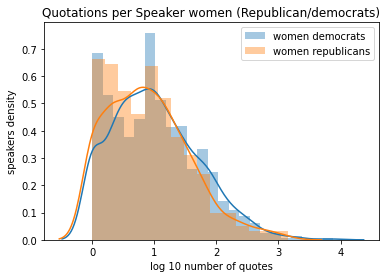

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


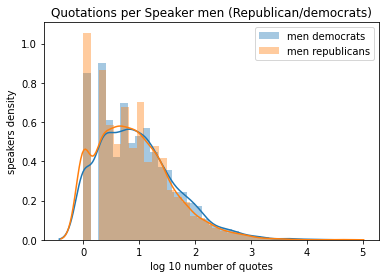

In [ ]:
ax = sns.distplot(np.log10(n_quotes_female_per_qid_demo), hist=True, label='women democrats');
ax = sns.distplot(np.log10(n_quotes_female_per_qid_repub), hist=True, label='women republicans')
ax.set(title='Quotations per Speaker women (Republican/democrats)',xlabel='log 10 number of quotes', ylabel='speakers density')
plt.legend()
plt.show()

ax2 = sns.distplot(np.log10(n_quotes_male_per_qid_demo), hist=True, label='men democrats');
ax2 = sns.distplot(np.log10(n_quotes_male_per_qid_repub), hist=True, label='men republicans')
ax2.set(title='Quotations per Speaker men (Republican/democrats)',xlabel='log 10 number of quotes', ylabel='speakers density')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


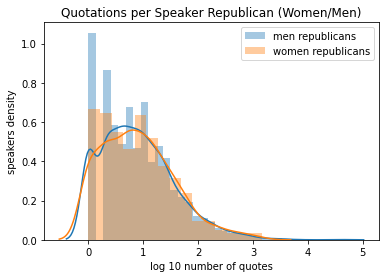

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


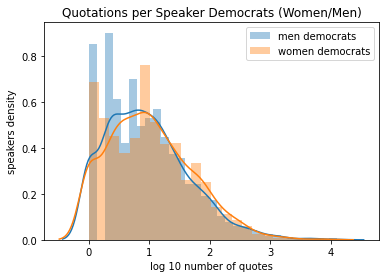

In [ ]:
ax = sns.distplot(np.log10(n_quotes_male_per_qid_repub), hist=True, label='men republicans');
axes = sns.distplot(np.log10(n_quotes_female_per_qid_repub), hist=True, label='women republicans')
ax.set(title='Quotations per Speaker Republican (Women/Men)',xlabel='log 10 number of quotes', ylabel='speakers density')
plt.legend()
plt.show()
ax2 = sns.distplot(np.log10(n_quotes_male_per_qid_demo), hist=True, label='men democrats');
ax2 = sns.distplot(np.log10(n_quotes_female_per_qid_demo), hist=True, label='women democrats')
ax2.set(title='Quotations per Speaker Democrats (Women/Men)',xlabel='log 10 number of quotes', ylabel='speakers density')
plt.legend()
plt.show()

# extract information from qid

In [ ]:
#extract information from qid
def extract_value_from_qid(qid):
  '''
  qid = string
  '''
  q_dict = get_entity_dict_from_api(qid)
  return q_dict['aliases']['en'][0]['value']

In [ ]:
extract_value_from_qid(female_qid)

'woman'

# Handle the quotes

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
from nltk.corpus import stopwords
import math
from collections import Counter
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()

# Tokenize, stem a document
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    return " ".join([stemmer.stem(word.lower()) for word in tokens])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
content = df['quotation'] #quotations
original_documents = [x.strip() for x in content] 
documents = [tokenize(d).split() for d in original_documents]
docs_n_doc_ids = list(zip(range(len(documents)), documents))


NameError: ignored

In [ ]:
original_documents

In [ ]:
documents

In [ ]:
docs_n_doc_ids

In [ ]:
# create the vocabulary
vocabulary = set([item for sublist in documents for item in sublist])
vocabulary = [word for word in vocabulary if word not in stopwords.words('english')]
vocabulary.sort()

In [ ]:
# compute IDF, storing idf values in a dictionary
def idf_values(vocabulary, documents):
    idf = {}
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents/sum(term in document for document in documents), math.e)
    return idf

# Function to generate the vector for a document (with normalisation)
def vectorize(document, vocabulary, idf):
    vector = [0]*len(vocabulary)
    counts = Counter(document)
    max_count = counts.most_common(1)[0][1]
    for i,term in enumerate(vocabulary):
        vector[i] = idf[term] * counts[term]/max_count
    return vector

# Function to compute cosine similarity
def cosine_similarity(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxy == 0:
            result = 0
    else:
            result = sumxy/math.sqrt(sumxx*sumyy)
    return result

def vectorize_query(query, vocabulary, idf):
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    query_vector = vectorize(q, vocabulary, idf)
    return query_vector
    
def search_vec(query, k):
    query_vector = vectorize_query(query, vocabulary, idf)
    scores = [[cosine_similarity(query_vector, document_vectors[d]), d] for d in range(len(documents))]
    scores.sort(key=lambda x: -x[0])
    ans = []
    indices = []
    for i in range(min(k,len(original_documents))):
        ans.append(original_documents[scores[i][1]])
        indices.append(scores[i][1])
    return ans, indices, query_vector

# Compute IDF values and vectors
idf = idf_values(vocabulary, documents)
document_vectors = [vectorize(s, vocabulary, idf) for s in documents]

In [ ]:
import operator

doc_vecs = np.transpose(np.array(document_vectors))
h = {}
for i, term in enumerate(vocabulary):
    ha = {}
    for docj in range(len(original_documents)):
        tfidf = doc_vecs[i][docj]
        ha[docj] = tfidf
    sorted_ha = sorted(ha.items(), key=operator.itemgetter(1), reverse=True)
    h[term] = sorted_ha

In [ ]:
def fagin_algorithm(query, h, k, vocabulary):
    
    # Split and stem the query
    q = query.split()
    q = set([stemmer.stem(w) for w in q])
    query_term_cnt = len(q)
    
    # select the posting lists for the query terms
    posting_lists = {}
    for term in q:
        if term in h:
            posting_lists[term] = h[term]
    
    max_len = len(documents)
    
    # Traverse the selected posting lists until we found k documents that appear in ALL posting lists
    # This corresponds to phase 1 of Fagin's algorithm.
    # As a result you produce a dictionary documents_occurrences, with the document identifiers as keys, 
    # and the number of documents found as value.
    # We stop traversing the posting lists until we have found k documents that appear in ALL posting lists 
    # of the query terms

    documents_occurrences = {}
    l = 0
    found_documents = 0
    while l < max_len:
        for term in q:
            d  = posting_lists[term][l][0]
            if d in documents_occurrences.keys():
                documents_occurrences[d] = documents_occurrences[d]+1
            else:
                documents_occurrences[d] = 1
            if documents_occurrences[d] == query_term_cnt:
                found_documents = found_documents + 1
        if found_documents == k:
            l = max_len + 1
            break
        else:
            l = l+1
                
    print(documents_occurrences)
        
    # Retrieve for the found documents the tfidf values and add them up.
    # For simplicity, we do not distinguish the cases whether the values have already been retrieved in the 
    # previous phase, or whether we use random access to obtain those values
    
    tfidf = {}
    for d in documents_occurrences.keys():
        t = 0
        for term in q:
            t = t + dict(posting_lists[term])[d]
        tfidf[d] = t
        
    # Finally we compute the top-k documents and return the answer
    
    ans = sorted(tfidf.items(), key=lambda x:x[1], reverse = True)[:k]
    return ans

In [ ]:
ans = fagin_algorithm("police", h, 2, vocabulary)
print(ans)
for document_id in ans:
    print(original_documents[document_id[0]])

{1: 1, 0: 1}
[(1, 1.6094379124341003), (0, 0.0)]
cancel contracts to train Saudi police and other security forces in U.S. counterterrorism tactics.
[ Department of Homeland Security ] was livid and strongly urged to have the agenda pulled.


# Generate Embeddings